In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CarsData.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3 Series,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [7]:
df.nunique()


model             196
year               27
price           13236
transmission        4
mileage         42214
fuelType            5
tax                48
mpg               208
engineSize         40
Manufacturer        9
dtype: int64

In [8]:
df['Manufacturer'].value_counts()


Manufacturer
ford          17811
volkswagen    14893
vauxhall      13258
merc          12860
BMW           10664
Audi          10565
toyota         6699
skoda          6188
hyundi         4774
Name: count, dtype: int64

In [9]:
df['model'].value_counts()


model
 Fiesta     6509
 Golf       4797
 Focus      4555
 C Class    3694
 Corsa      3285
            ... 
E Class        1
200            1
 Ranger        1
180            1
220            1
Name: count, Length: 196, dtype: int64

In [10]:
df['fuelType'].value_counts()


fuelType
Petrol      53982
Diesel      40419
Hybrid       3059
Other         246
Electric        6
Name: count, dtype: int64

In [11]:
df['transmission'].value_counts()


transmission
Manual       55502
Semi-Auto    22296
Automatic    19905
Other            9
Name: count, dtype: int64

### EDA (Exploratory Data Analysis)

In [12]:
num_cols = df.select_dtypes(include = ['float','int']).columns
cat_cols = df.select_dtypes(include = ['object','category']).columns

<Axes: >

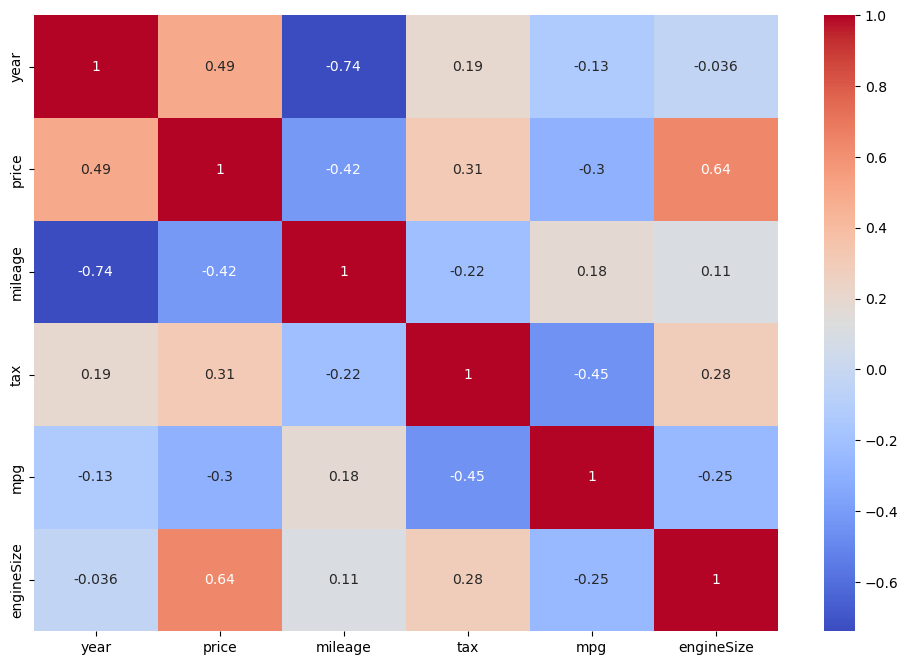

In [13]:
corr = df[num_cols].corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr,cmap = 'coolwarm',annot = True)

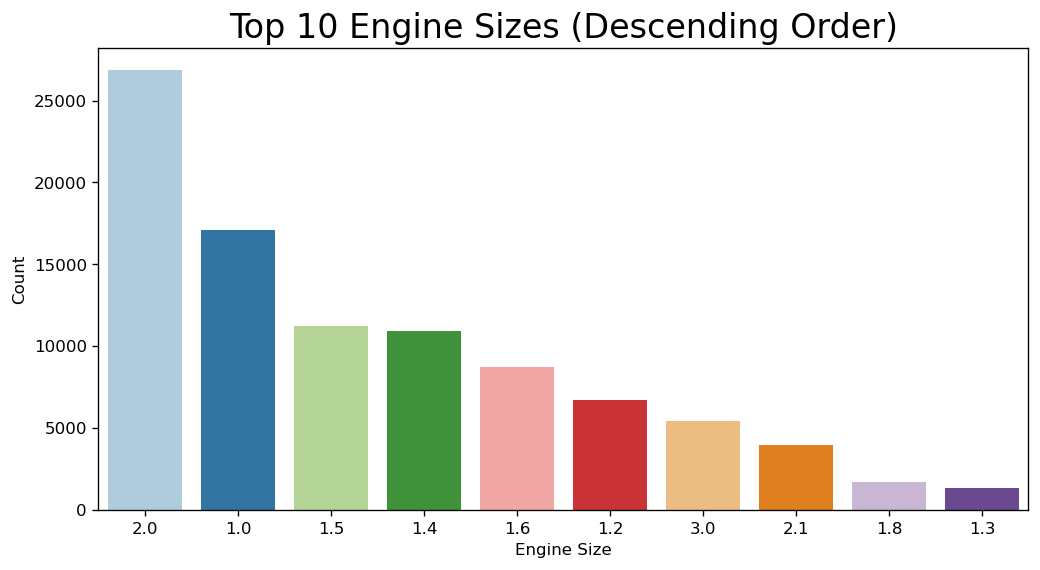

In [14]:
engine_size_counts = df['engineSize'].value_counts()

# Sort the engine sizes in descending order of frequency
engine_size_counts_sorted = engine_size_counts.sort_values(ascending=False)

# Select the top 10 engine sizes
top_10_engine_sizes = engine_size_counts_sorted.head(10)

# Create the bar plot
plt.figure(figsize=(10, 5), dpi=120)
sns.countplot(data=df[df['engineSize'].isin(top_10_engine_sizes.index)], x='engineSize', order=top_10_engine_sizes.index, palette='Paired')
plt.title("Top 10 Engine Sizes (Descending Order)", fontsize=20)
plt.xlabel("Engine Size")
plt.ylabel("Count")
plt.show()

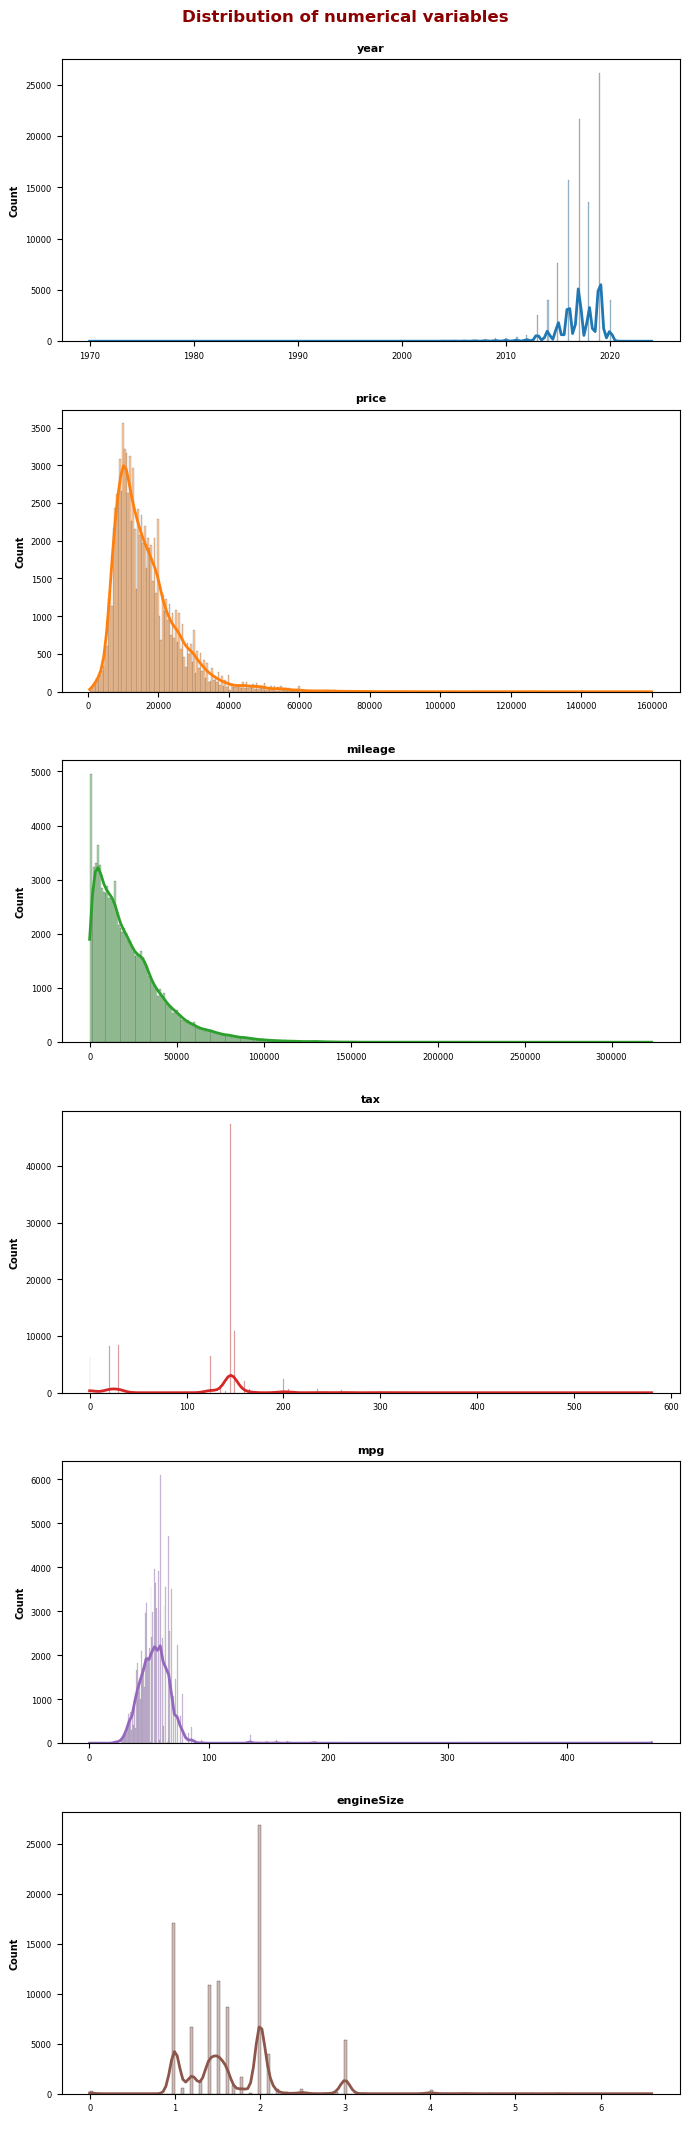

In [15]:
fig,axes = plt.subplots(7, 1, figsize = (7, 25))
axes = axes.flat

for i, num_col in enumerate(num_cols):
  sns.histplot(df,
               x = num_col,
               stat = 'count',
               kde = True,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               line_kws = {'linewidth': 2},
               alpha = 0.4,
               ax = axes[i])

  axes[i].set_xlabel(" ")
  axes[i].set_ylabel("Count", fontsize = 7, fontweight = 'bold', color = 'black')
  axes[i].set_title(num_col, fontsize = 8, fontweight = 'bold', color = 'black')
  axes[i].tick_params(labelsize = 6)


fig.delaxes(axes[6])
fig.suptitle('Distribution of numerical variables', fontsize = 12, fontweight = 'bold', color = 'darkred')
fig.tight_layout()
fig.subplots_adjust(top = 0.96)
fig.show()

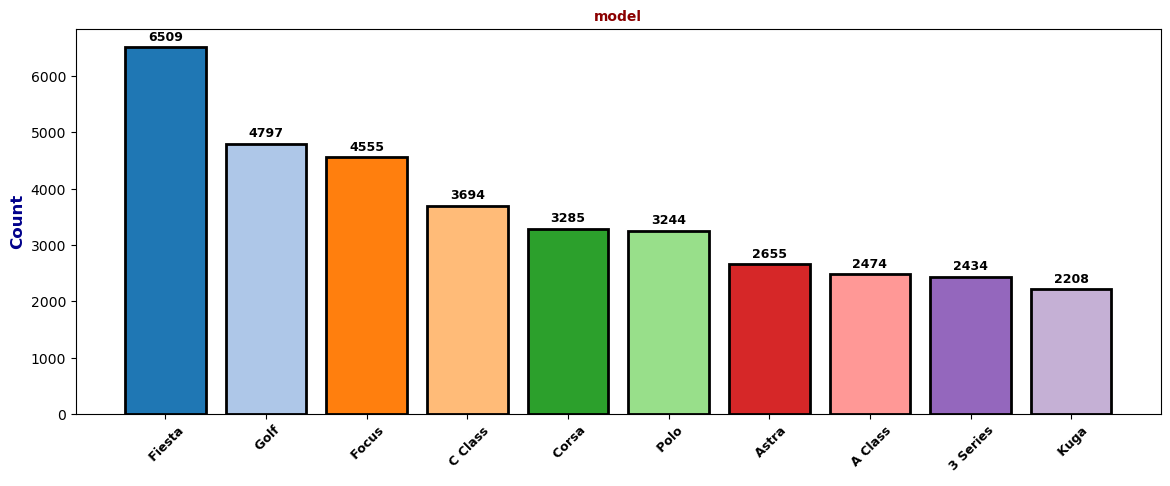

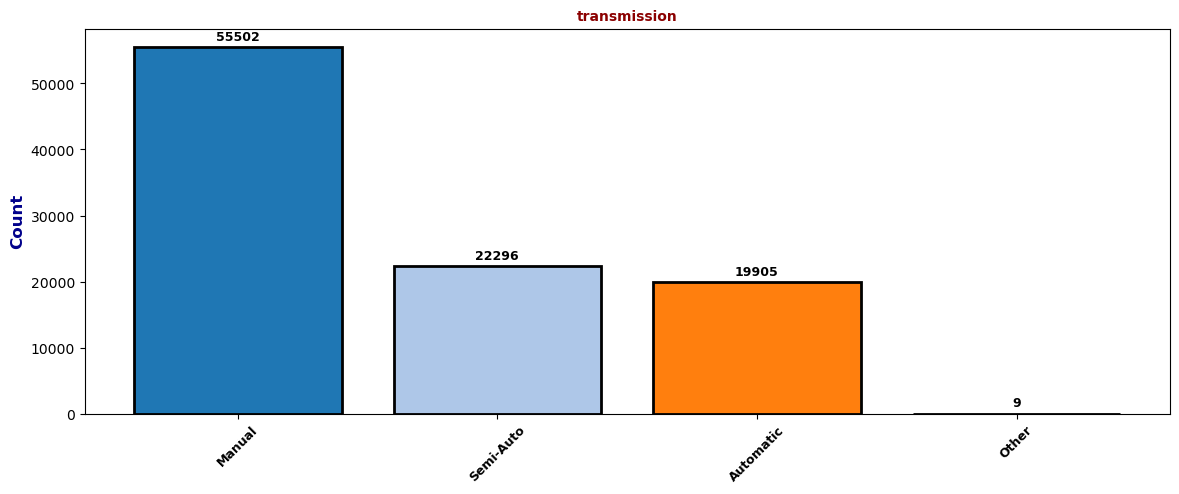

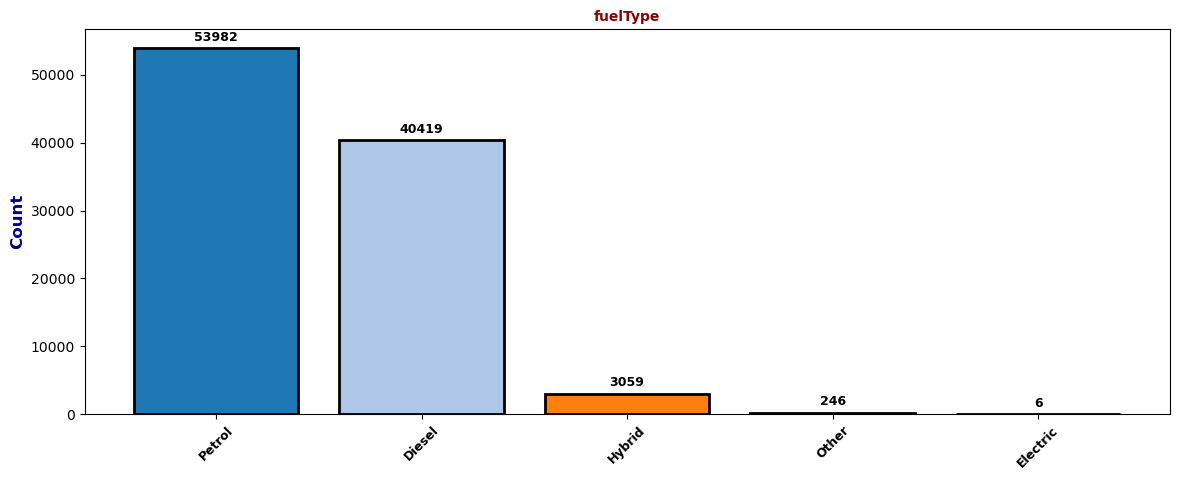

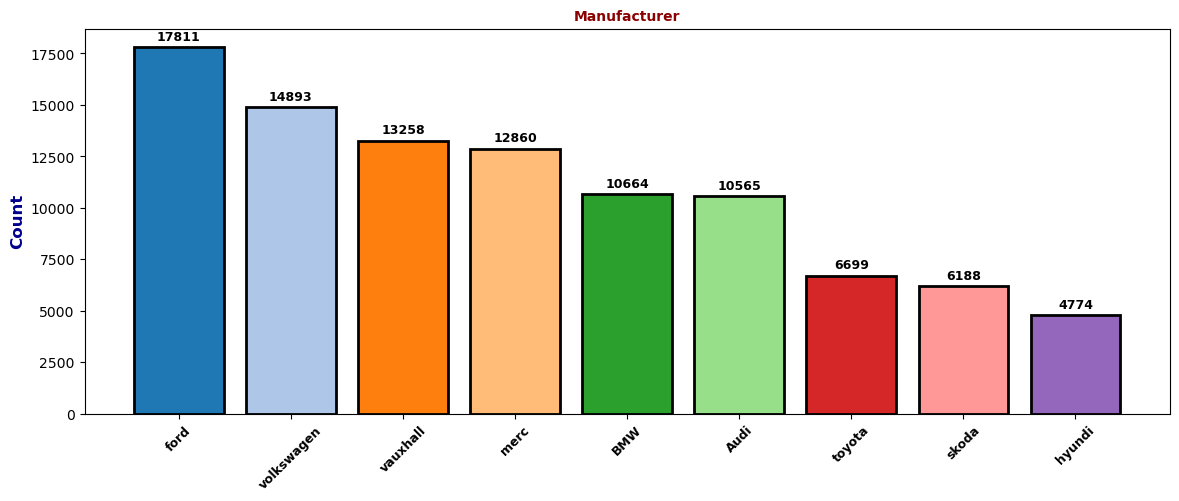

In [16]:
cols = [0, 1, 2, 3]

for i in cols:

        if i == 0:

            # We define the size of our figure.
            fig,ax = plt.subplots(figsize=(14,5))

            # 1. We create our dataframe that contains our data to be displayed.
            df_name = df[cat_cols[0]].value_counts().to_frame().head(10)

            # 2. We generate the values of our graphs.
            values = df_name.iloc[:,0]
            # 3. We generate the labels for our charts.
            labels = df_name.index.to_list()
            # 4. We generate the color map.
            cmap = plt.get_cmap('tab20')
            colors = cmap(np.arange(len(labels)))


            # 2. Bar chart.
            rects = ax.bar(labels, values, color = colors,
                              edgecolor = 'black', linewidth = 2.0)

            ax.set_title(f"{cat_cols[0]}", fontsize = 10, fontweight = 'bold', color = 'darkred')
            ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold', rotation = 45)

            # function to label our bars.
            def autolabel(rects):
              for rect in rects:
                height = rect.get_height()
                ax.annotate(text = '{}'.format(height),
                            xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                            xytext = (0,3),
                            textcoords = 'offset points',
                            va = 'bottom',
                            ha = 'center',
                            weight = 'bold',
                            size = 9,
                            color = 'black')

            autolabel(rects) # we label our bars.

            fig.show()
            
        else:
            
            # We define the size of our figure.
            fig,ax = plt.subplots(figsize=(14,5))

            # 1. We create our dataframe that contains our data to be displayed.
            df_name = df[cat_cols[i]].value_counts().to_frame().head(10)

            # 2. We generate the values of our graphs.
            values = df_name.iloc[:,0]
            # 3. We generate the labels for our charts.
            labels = df_name.index.to_list()
            # 4. We generate the color map.
            cmap = plt.get_cmap('tab20')
            colors = cmap(np.arange(len(labels)))


            # 2. Bar chart.
            rects = ax.bar(labels, values, color = colors,
                              edgecolor = 'black', linewidth = 2.0)

            ax.set_title(f"{cat_cols[i]}", fontsize = 10, fontweight = 'bold', color = 'darkred')
            ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
            ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold', rotation = 45)

            # function to label our bars.
            def autolabel(rects):
              for rect in rects:
                height = rect.get_height()
                ax.annotate(text = '{}'.format(height),
                            xy = (rect.get_x() + rect.get_width()/2., height-0.005),
                            xytext = (0,3),
                            textcoords = 'offset points',
                            va = 'bottom',
                            ha = 'center',
                            weight = 'bold',
                            size = 9,
                            color = 'black')

            autolabel(rects) # we label our bars.

            fig.show()

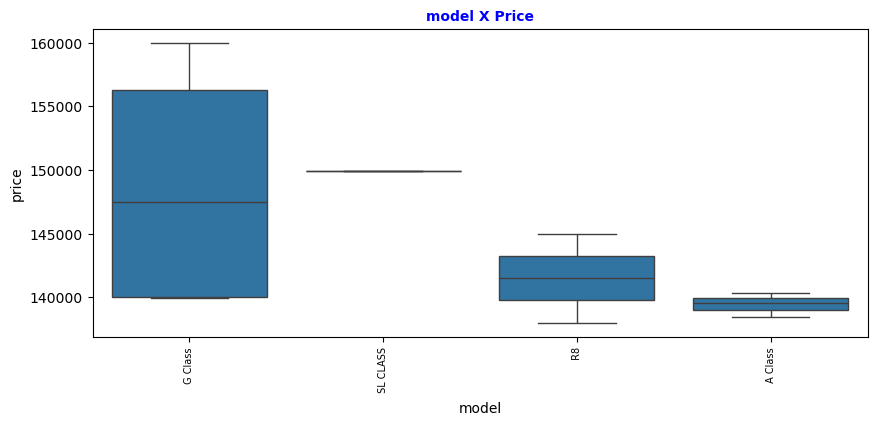

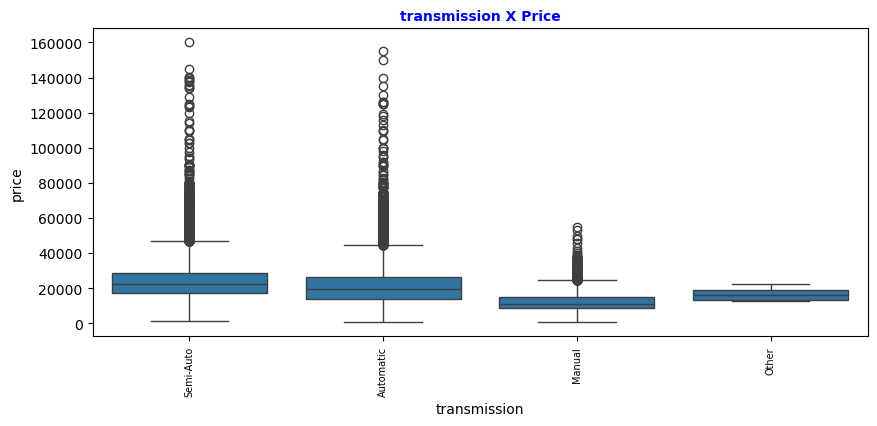

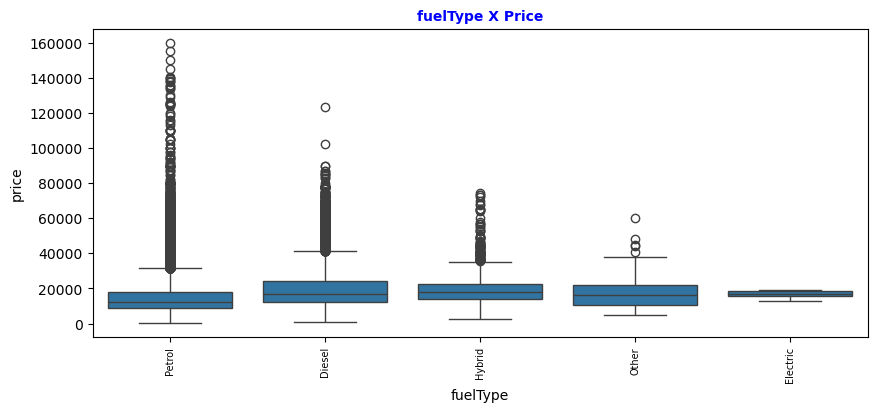

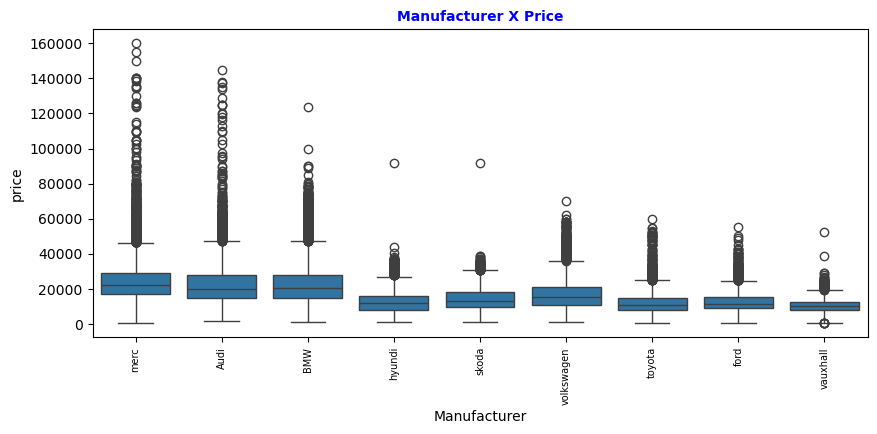

In [17]:
cols = [0, 1, 2, 3]

df_top = df.sort_values(["price"], axis=0, ascending=False)

for i in cols:
        fig, ax = plt.subplots(figsize=(10, 4))

        if i == 0:
                sns.boxplot(x = 'model', y = 'price', data = df_top.head(10))
                ax.set_title(f"{cat_cols[i]}" + " X Price", fontsize = 10, fontweight = 'bold', color = 'blue')
                plt.xticks(rotation=90, fontsize = 7)
                plt.show()

        else:
                sns.boxplot(x = cat_cols[i], y = 'price', data = df_top)
                ax.set_title(f"{cat_cols[i]}"+ " X Price", fontsize = 10, fontweight = 'bold', color = 'blue')
                plt.xticks(rotation=90, fontsize = 7)
                plt.show()


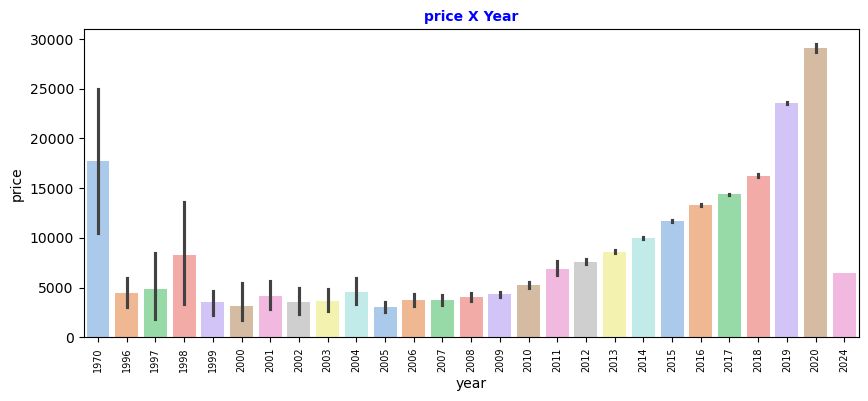

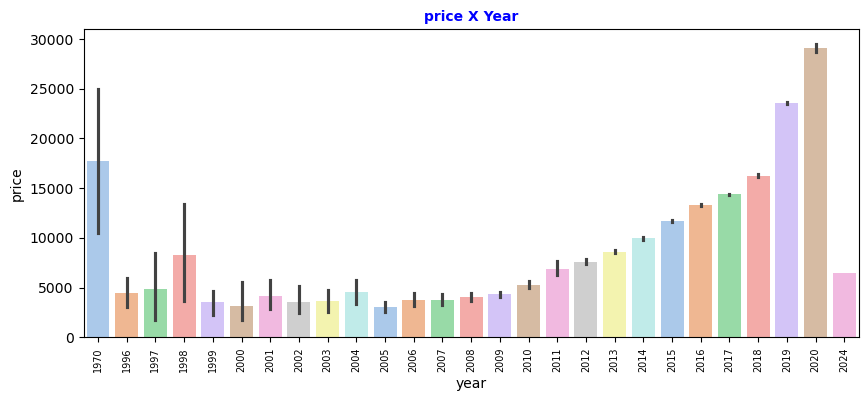

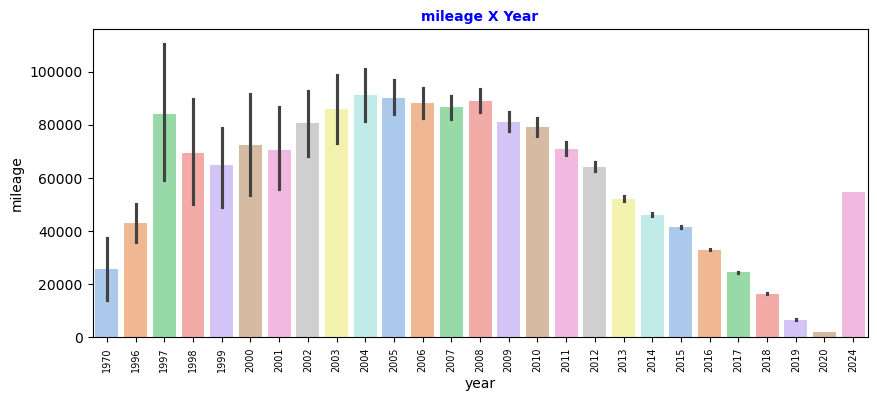

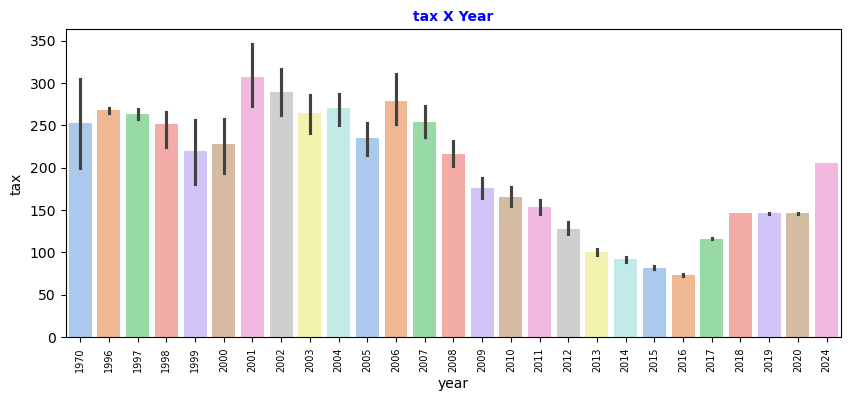

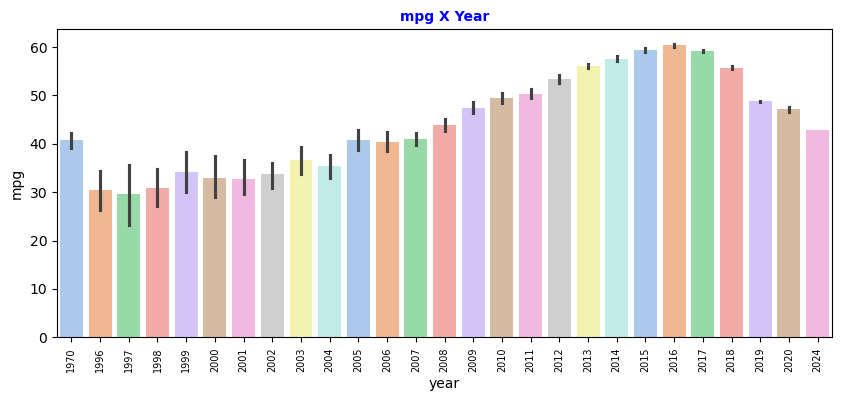

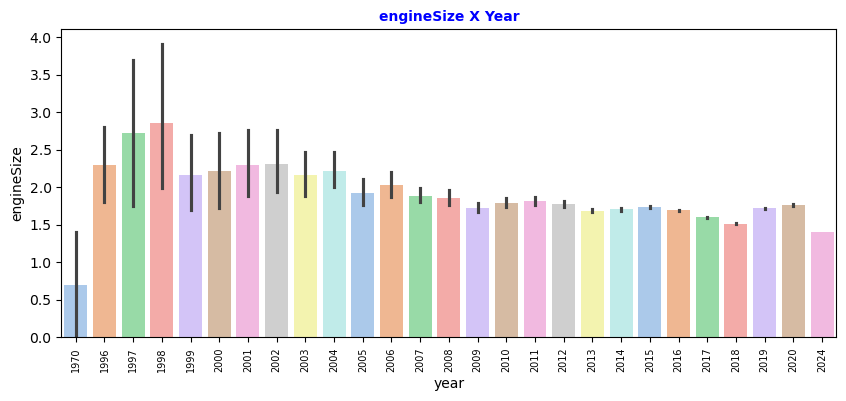

In [18]:
for i in num_cols:
        fig, ax = plt.subplots(figsize=(10, 4))

        if i == 'year':
            sns.barplot(data=df, x = 'year', y = 'price', palette="pastel")
            ax.set_title('price'  + " X Year", fontsize = 10, fontweight = 'bold', color = 'blue')
            plt.xticks(rotation=90, fontsize = 7)
            plt.show()
        else:
            sns.barplot(data=df, x = 'year', y = i, palette="pastel")
            ax.set_title(f"{i}"+ " X Year", fontsize = 10, fontweight = 'bold', color = 'blue')
            plt.xticks(rotation=90, fontsize = 7)
            plt.show()

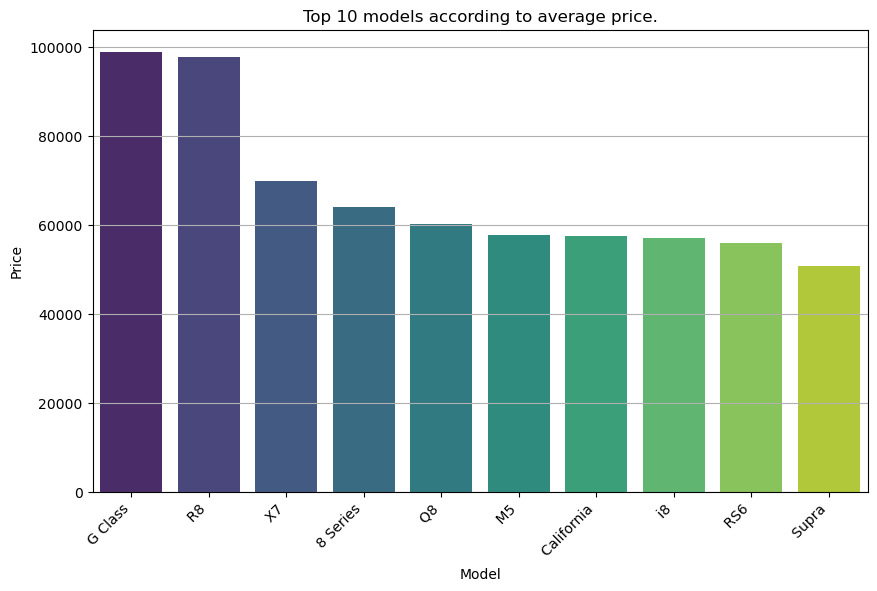

In [19]:
char_bar = df.groupby(['model'])[['price']].mean().reset_index()
char_bar = char_bar.sort_values(by=("price"), ascending=False)

top = char_bar.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='model', y='price', data=top, palette='viridis')
plt.title('Top 10 models according to average price.')
plt.xlabel('Model')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

In [20]:
df_fiesta = df[df['model'] == ' Fiesta']
df_fiesta.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
8,Fiesta,2018,9891,Manual,31639,Petrol,145,65.7,1.0,ford
16,Fiesta,2017,10490,Manual,16087,Petrol,0,65.7,1.0,ford
21,Fiesta,2017,12750,Semi-Auto,12687,Petrol,145,54.3,1.0,ford
30,Fiesta,2018,10500,Manual,13427,Petrol,145,65.7,1.0,ford


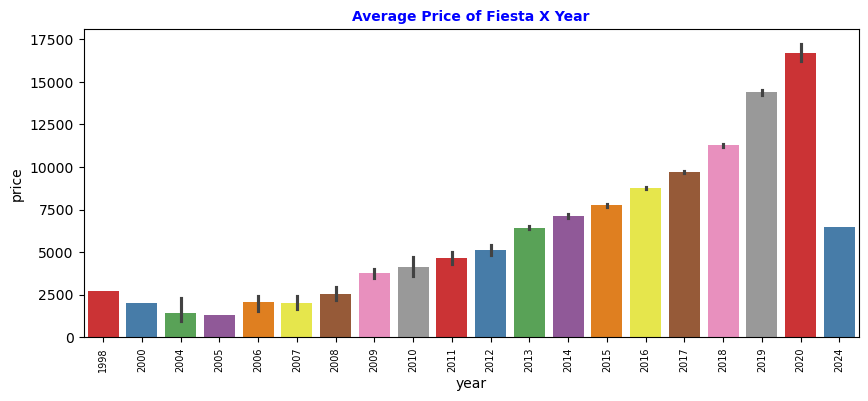

In [21]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=df_fiesta, x = 'year', y = 'price', palette="Set1")
ax.set_title('Average Price of Fiesta X Year', fontsize = 10, fontweight = 'bold', color = 'blue')
plt.xticks(rotation=90, fontsize = 7)
plt.show()

Text(0, 0.5, 'Total Price')

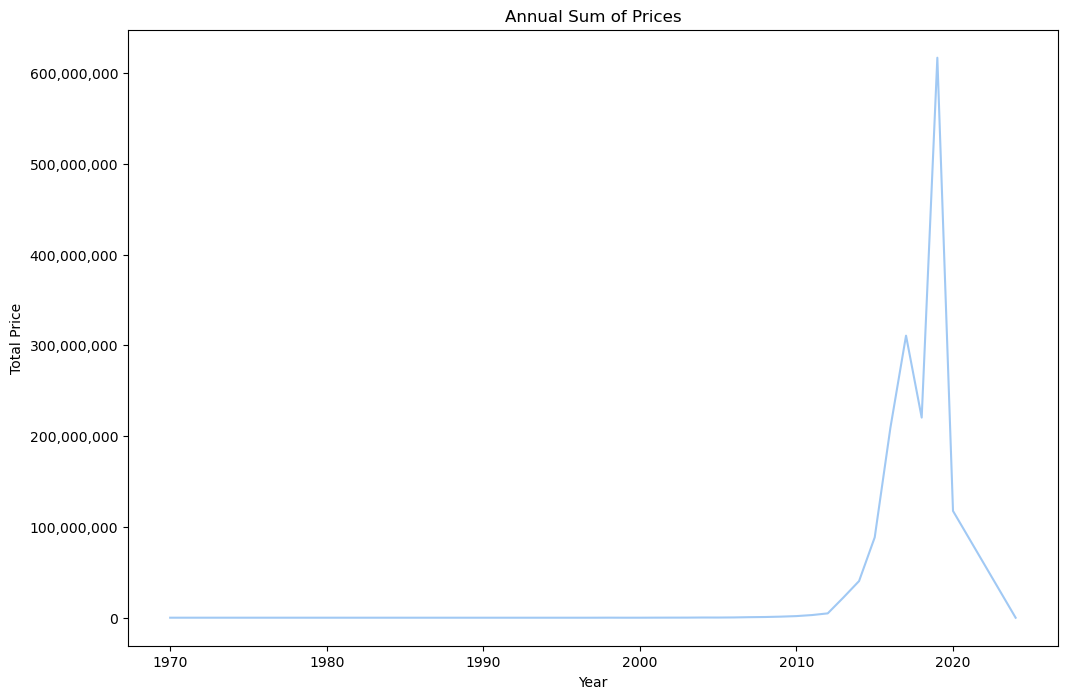

In [22]:
plt.figure(figsize=(12, 8))
ax = df.groupby('year')['price'].sum().plot(kind='line', color=sns.color_palette('pastel'))

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.title('Annual Sum of Prices')
plt.xlabel('Year')
plt.ylabel('Total Price')

In [23]:
df_temp = df[df.year > 2015]
df_temp

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
97705,Kuga,2017,14795,Manual,25570,Diesel,150,60.1,2.0,ford
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2016'),
  Text(1, 0, '2017'),
  Text(2, 0, '2018'),
  Text(3, 0, '2019'),
  Text(4, 0, '2020'),
  Text(5, 0, '2024')])

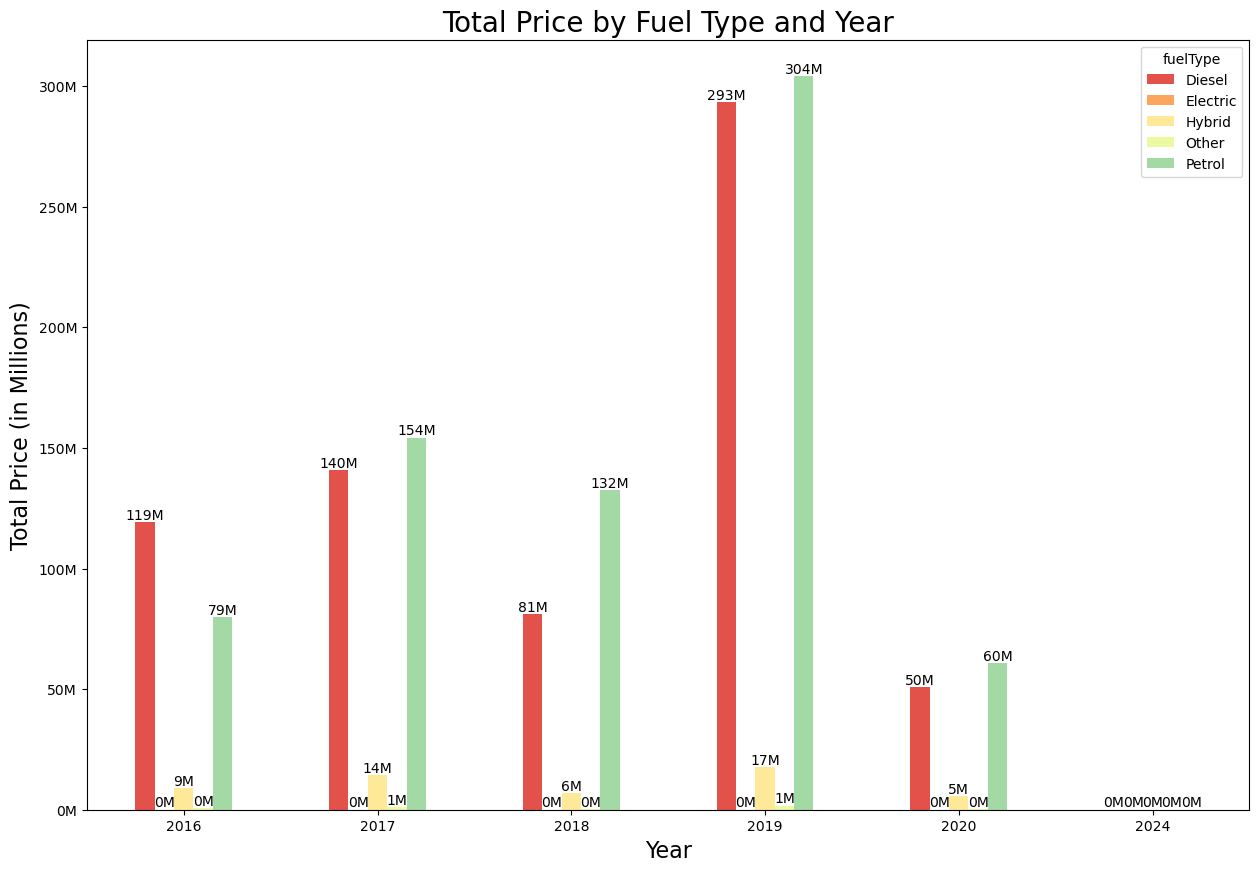

In [24]:
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return f'{int(x / 1e6)}M'


ax = df_temp.groupby(['year', 'fuelType'])['price'].sum().unstack().plot(
    kind='bar',
    color=sns.color_palette("Spectral"),
    figsize=(15, 10) 
)

formatter = FuncFormatter(millions)

ax.set_title('Total Price by Fuel Type and Year', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Total Price (in Millions)', fontsize=16)

ax.yaxis.set_major_formatter(formatter)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height() / 1e6)}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xticks(rotation=0)

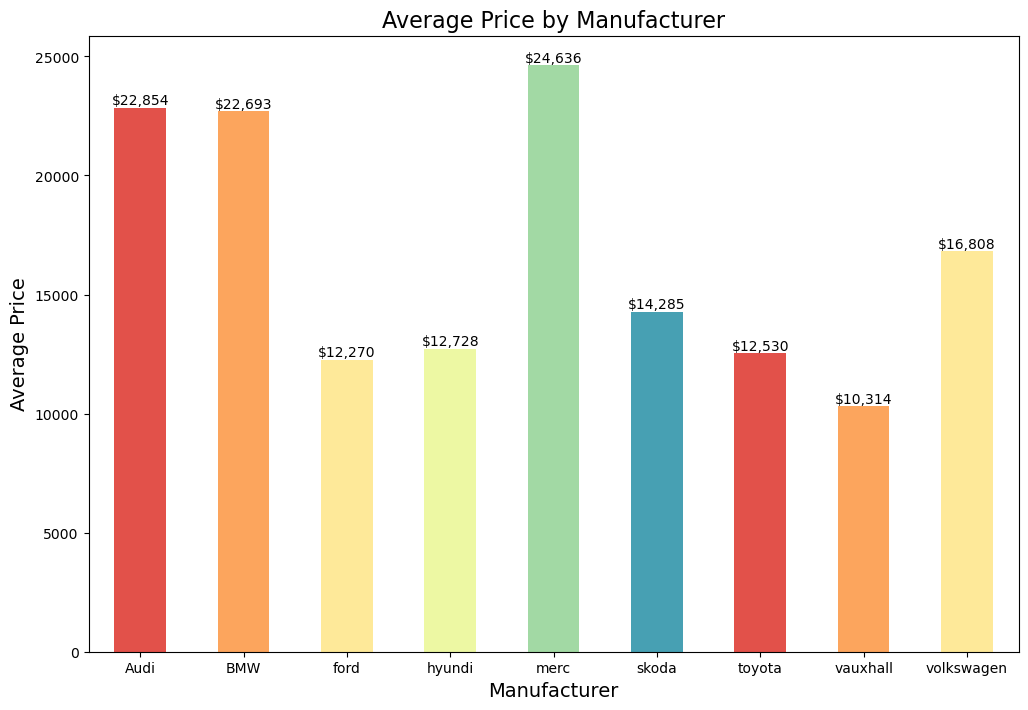

In [25]:
plt.figure(figsize=(12, 8))
ax = df.groupby('Manufacturer')['price'].mean().plot(kind='bar', color=sns.color_palette("Spectral"))

ax.set_title('Average Price by Manufacturer', fontsize=16)
ax.set_xlabel('Manufacturer', fontsize=14)
ax.set_ylabel('Average Price', fontsize=14)

plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

In [26]:
df.groupby("model")['price'].sum().sort_values()

model
 Accent          1295
 Amica           1750
 A2              2490
 Escort          3000
 Streetka        3849
               ...   
 E Class     48988844
 Focus       60030224
 Fiesta      66332283
 Golf        79811121
 C Class     87391114
Name: price, Length: 196, dtype: int64

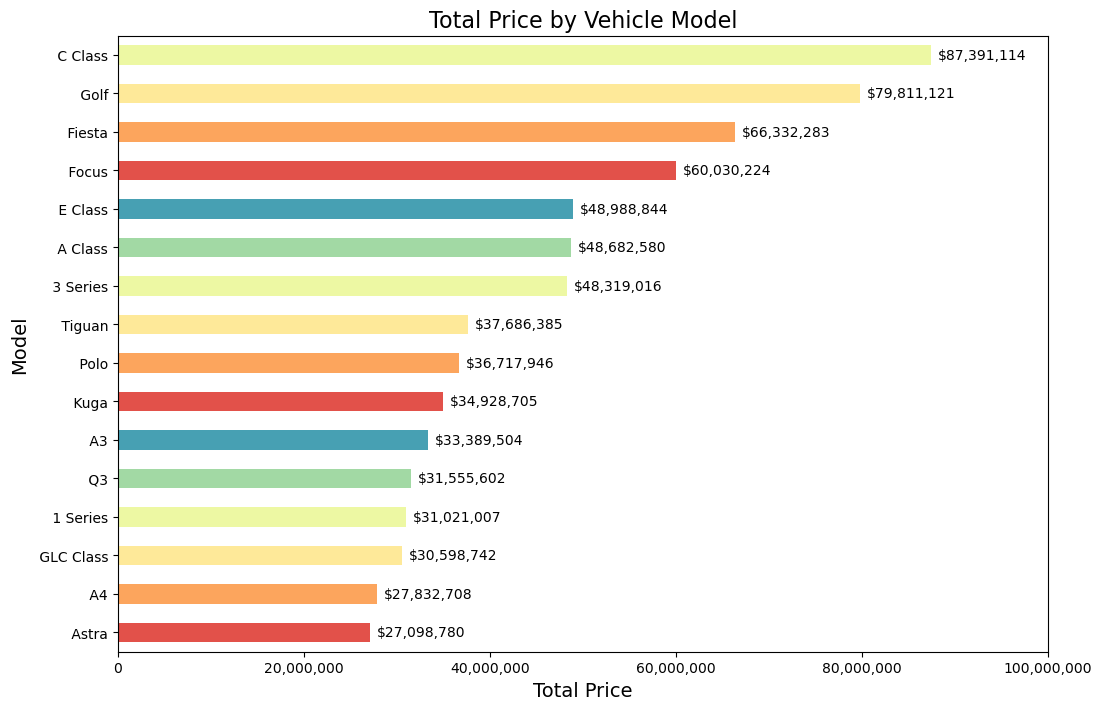

In [27]:
plt.figure(figsize=(12, 8))
ax = df.groupby("model")['price'].sum().sort_values(ascending=False)[15::-1].plot(
    kind='barh',
    color=sns.color_palette("Spectral")
)

ax.set_title('Total Price by Vehicle Model', fontsize=16)
ax.set_xlabel('Total Price', fontsize=14)
ax.set_ylabel('Model', fontsize=14)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
for p in ax.patches:
    ax.annotate(f'${p.get_width():,.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

ax.set_xlim(0, 100_000_000)
plt.show()

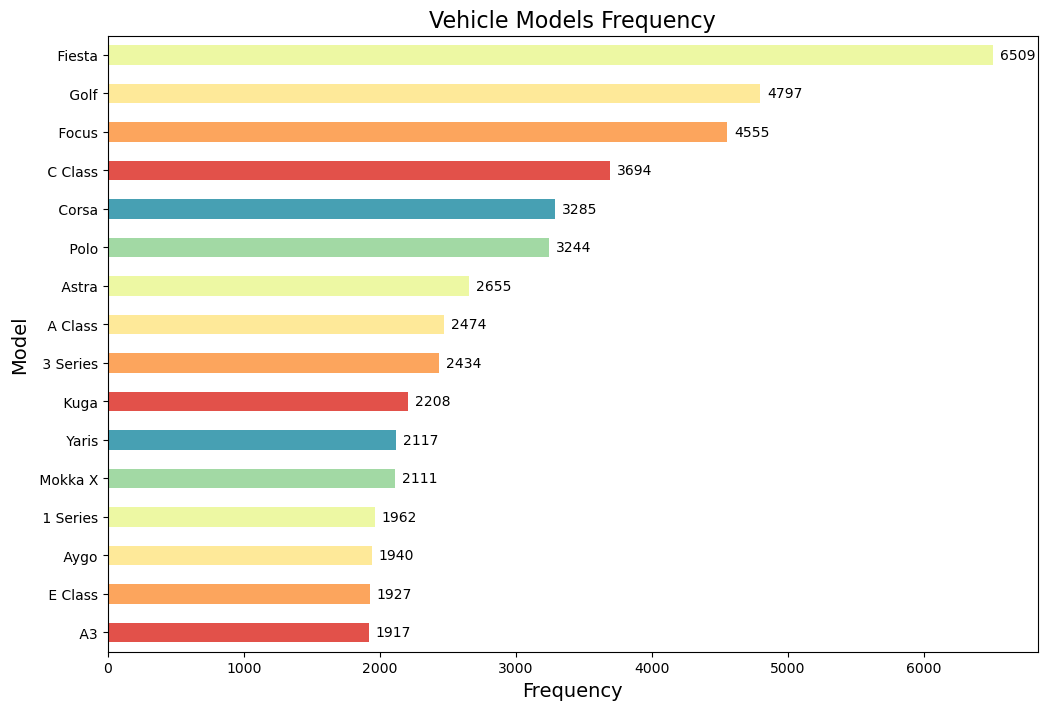

In [28]:
plt.figure(figsize=(12, 8))
ax = df.model.value_counts()[15::-1].plot(kind='barh', x='model', y='count', color=sns.color_palette("Spectral"))

ax.set_title('Vehicle Models Frequency', fontsize=16)
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('Model', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                textcoords='offset points')

### Feature Engineering


In [29]:
df.drop(columns=['model'], inplace=True)

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['transmission'] = le.fit_transform(df['transmission'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['Manufacturer'] = le.fit_transform(df['Manufacturer'])

In [31]:
df

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,2017,7495,1,11630,4,145,60.1,1.0,3
1,2017,10989,1,9200,4,145,58.9,1.0,8
2,2019,27990,3,1614,0,145,49.6,2.0,1
3,2017,12495,1,30960,0,150,62.8,2.0,5
4,2017,7999,1,19353,4,125,54.3,1.2,2
...,...,...,...,...,...,...,...,...,...
97707,2017,10447,0,8337,4,145,54.3,1.0,2
97708,2014,14995,1,25372,0,30,61.4,2.0,1
97709,2017,8950,1,19910,4,125,54.3,1.2,2
97710,2017,10700,0,24468,4,125,50.4,1.4,7


### Model


In [32]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
x= df.drop('price',axis=1)
y= df['price']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
# Linear Regression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
linear_r2 = r2_score(y_test, y_pred)
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('Linear Regression R2 Score:', r2_score(y_test, y_pred))
print('Linear Regression RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))

Linear Regression R2 Score: 0.7151628410670583
Linear Regression RMSE Score: 5265.7732529683035


In [42]:
# Decision Tree Regressor
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
dt_r2 = r2_score(y_test, y_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('DecisionTreeRegressor R2 Score:', r2_score(y_test, y_pred))
print('DecisionTreeRegressor RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))

DecisionTreeRegressor R2 Score: 0.8923877888098615
DecisionTreeRegressor RMSE Score: 3236.641581031794


In [43]:
# Random Forest Regressor
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rf_r2 = r2_score(y_test, y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('RandomForestRegressor R2 Score:', r2_score(y_test, y_pred))
print('RandomForestRegressor RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))

RandomForestRegressor R2 Score: 0.9320678182437104
RandomForestRegressor RMSE Score: 2571.5893175283363


In [44]:
# Gradient Boosting Regressor
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
gb_r2 = r2_score(y_test, y_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print('GradientBoostingRegressor R2 Score:', r2_score(y_test, y_pred))
print('GradientBoostingRegressor RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))

GradientBoostingRegressor R2 Score: 0.8846767439286543
GradientBoostingRegressor RMSE Score: 3350.597649606644


In [39]:
# Storing scores in lists
algorithm = ['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor']
R2 = [linear_r2, dt_r2, rf_r2, gb_r2]
RMSE = [linear_rmse, dt_rmse, rf_rmse, gb_rmse]


In [51]:
# Creating DataFrame
df1 = pd.DataFrame({'Algorithm': algorithm, 'R2 Score': R2, 'RMSE': RMSE})
df1

,Algorithm,R2 Score,RMSE
0,LinearRegression,0.715163,5265.773253
1,DecisionTreeRegressor,0.891884,3244.208571
2,RandomForestRegressor,0.932720,2559.213793
3,GradientBoostingRegressor,0.884436,3354.095677


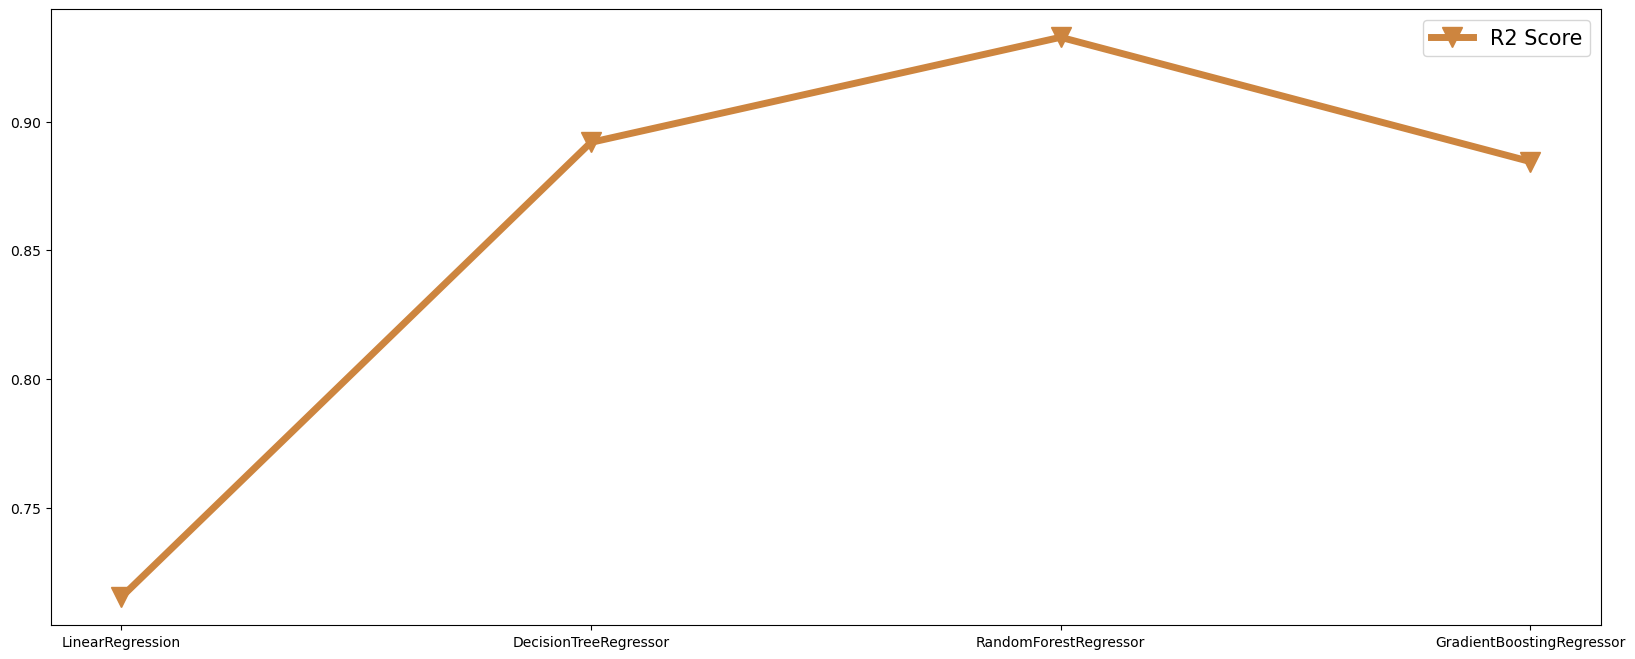

In [52]:
fig = plt.figure(figsize=(20,8))
plt.plot(df1.Algorithm, df1['R2 Score'], label='R2 Score', lw=5, color='peru', marker='v', markersize=15)
plt.legend(fontsize=15)
plt.show()

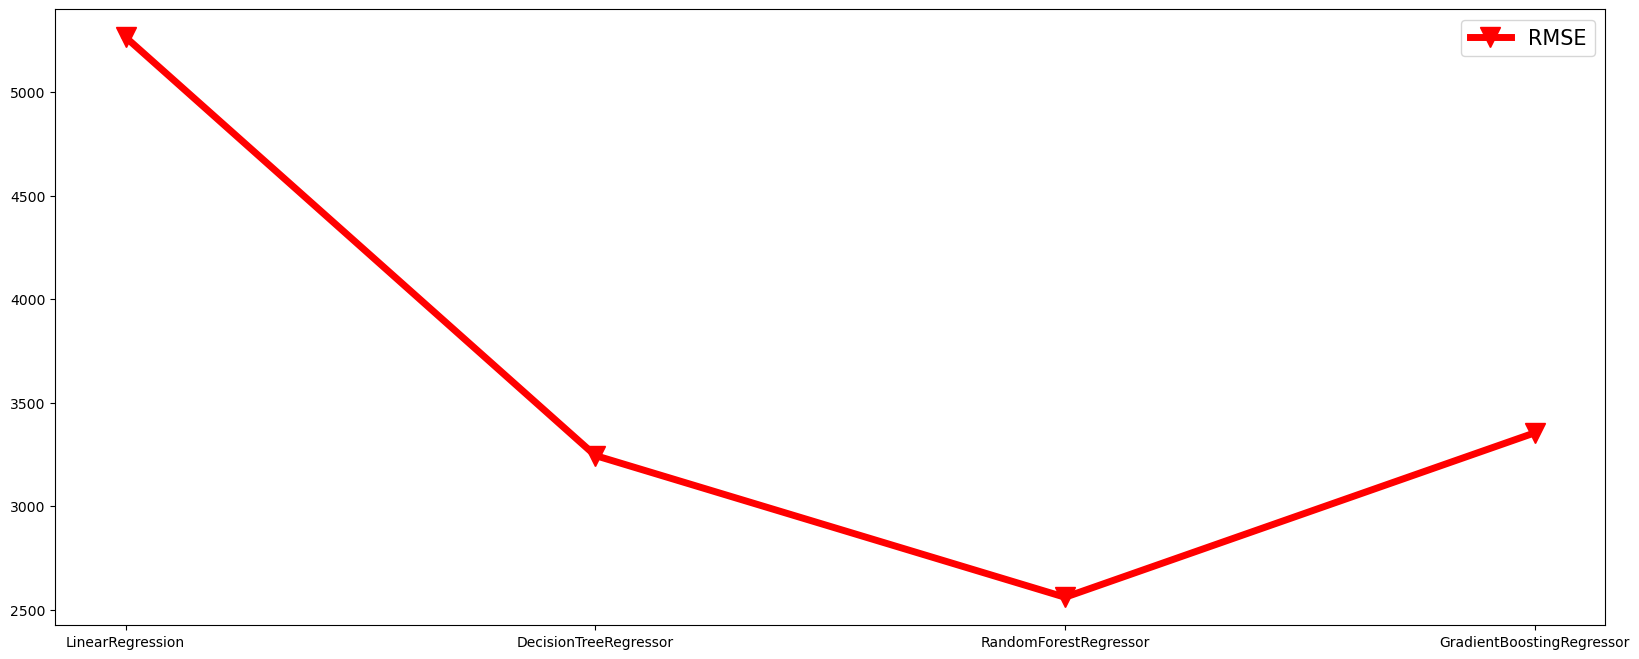

In [53]:
fig = plt.figure(figsize=(20,8))
plt.plot(df1.Algorithm, df1['RMSE'], label='RMSE', lw=5, color='red', marker='v', markersize=15)
plt.legend(fontsize=15)
plt.show()